# Grip At The Sparks Foundation Intenship

# Author : Aalliya Pathan

# TASK-6

# Prediction using Decision Tree Algorithm
                      (Level - Intermediate)

### Importing the Required Libraries and Reading the data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
%matplotlib inline


from sklearn import metrics


In [3]:
data=pd.read_csv("Iris.csv")


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### Common Dataset exploration checking for shape, null, missing values

In [6]:
# Checking Shape of Dataset

data.shape

(150, 6)

In [7]:
data.isnull().sum() # Checking for any missing value

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Looking for short description of dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


After performing above steps we can say that this dataset perfectly cleaned and we can process further with this dataset.

### Splitting Data into Training and Testing

In [9]:

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Create features matrix
x = data.loc[:, features].values


In [10]:
y=data.Species

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

## Decision tree algorithm


In [12]:

clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

Training the model on the data, storing the information learned from the data



In [13]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

##### Predict for Multiple Observations at Once

In [14]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

### Measuring Model Performance

In [15]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [16]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



- Setosa flower accuracy is 1.0
- Versicolor precision is 0.83
- Virginica precision is 0.86.

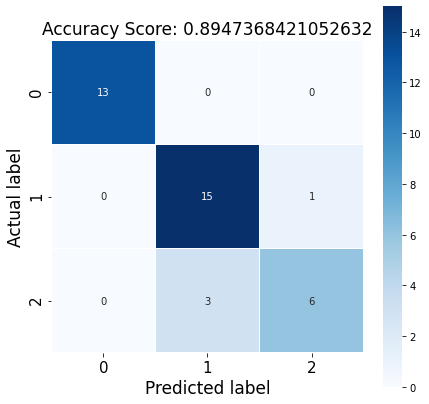

In [17]:
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### Finding the Optimal max_depth

In [18]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

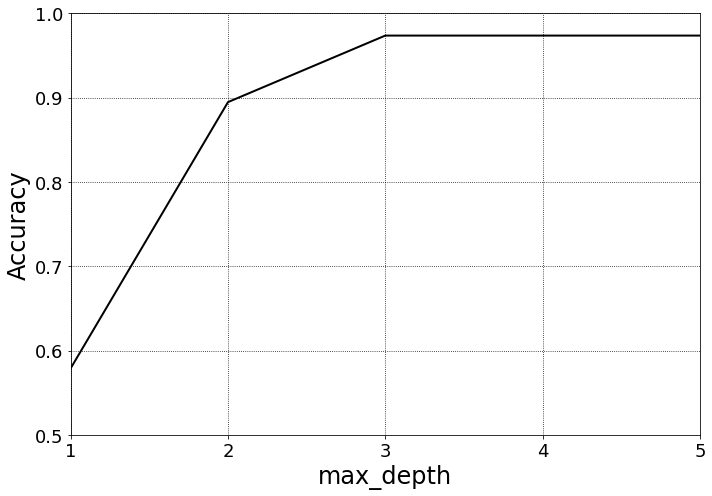

In [19]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()


### Visualizing Decision Trees

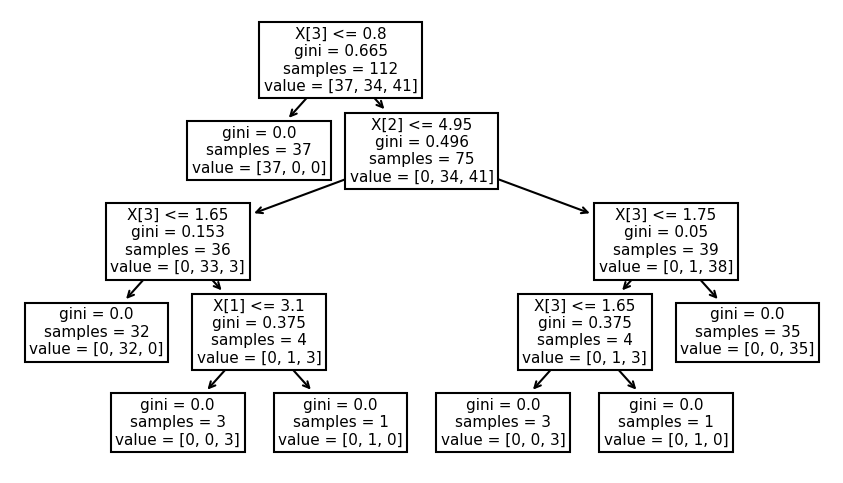

In [20]:

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(clf);

### Make Tree More Interpretable

##### The code below make the decision tree more interpretable by adding in feature and class names.

In [21]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

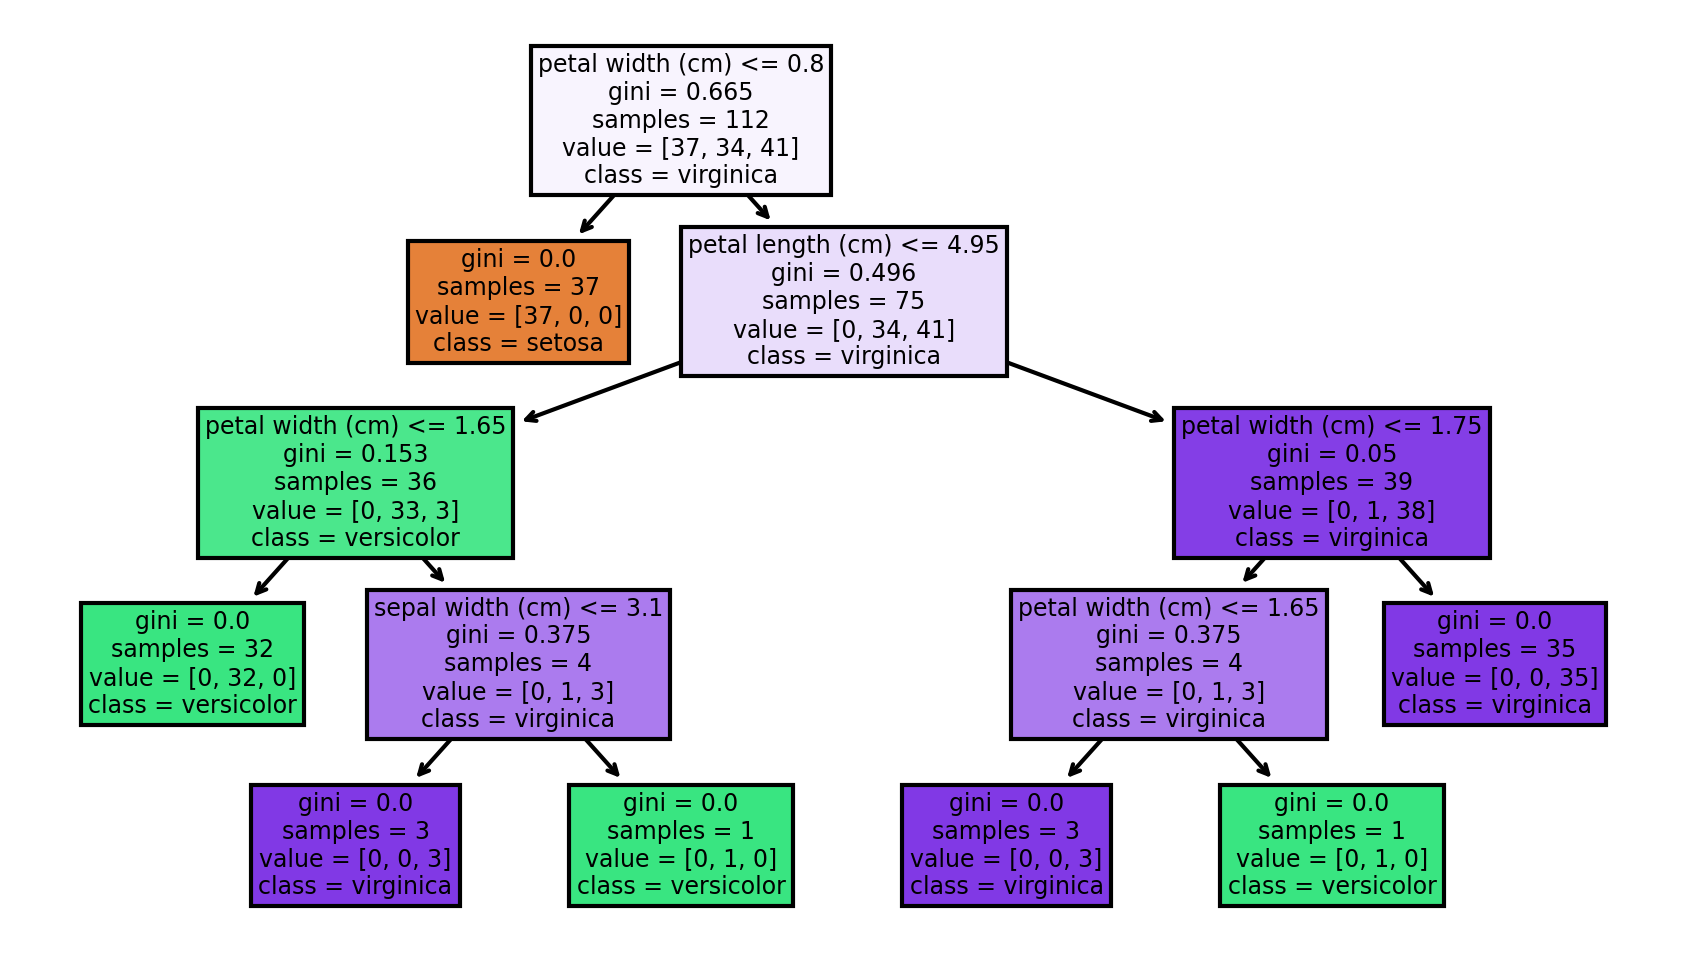

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Conclusion:

- After Importing, Fit our dataset in our model, accuracy is 89.47%.
- We can clearly see model performance by confusion matrix and classification report.
- By ploting accuracy score depth wise graph, optimal depth for model is 3.